**CSCN8010 - Lab**

**Practical Lab 8 - MNIST Classification with Dense Neural Networks (using Tensorflow)**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
# training dataset
train_data = pd.read_csv("fashion-mnist_train.csv")
# testing dataset
test_data = pd.read_csv("fashion-mnist_test.csv")

In [ ]:
# Convert pandas DataFrames to numpy arrays
train_images = train_data.drop(columns=["label"]).values.astype('float32')
train_labels = train_data['label'].values
test_images = test_data.drop(columns=["label"]).values.astype('float32')
test_labels = test_data['label'].values
# Reshape the images to 28x28
train_images = train_images.reshape(train_images.shape[0], 28, 28)
test_images = test_images.reshape(test_images.shape[0], 28, 28)

**Exploratory Data Analysis**

In [ ]:
# merging train and test data for EDA
full_data = pd.concat([train_data, test_data], ignore_index=True)
full_data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Checking for missing values
print("\nMissing values in the dataset:")
print(full_data.isnull().sum())


Missing values in the dataset:
label       0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel780    0
pixel781    0
pixel782    0
pixel783    0
pixel784    0
Length: 785, dtype: int64


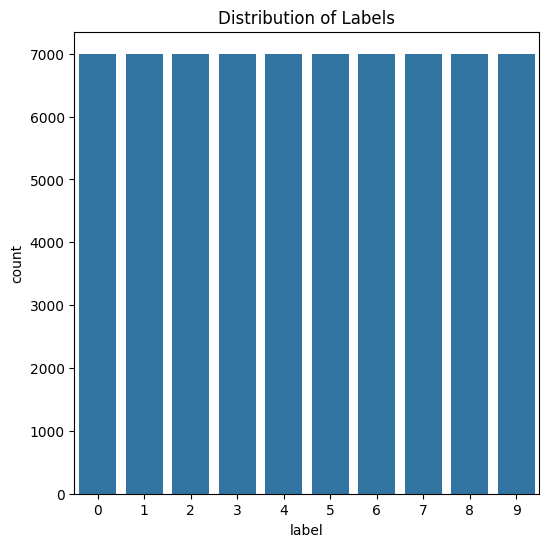

In [ ]:
# distribution of labels
plt.figure(figsize=(6, 6))
sns.countplot(x='label', data=full_data)
plt.title('Distribution of Labels')
plt.show()

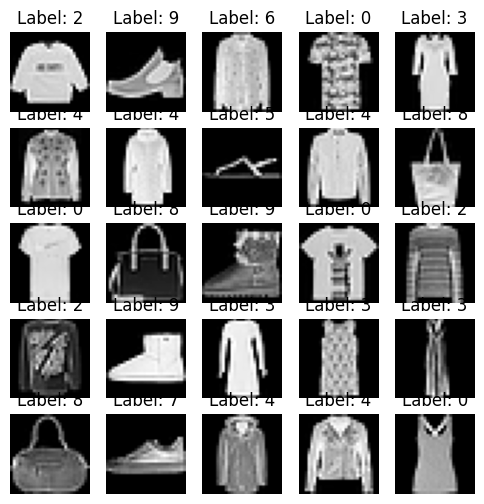

In [ ]:
# sample images
plt.figure(figsize=(6, 6))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(train_data.iloc[i, 1:].values.reshape(28, 28), cmap='gray')
    plt.title(f"Label: {train_data.iloc[i, 0]}")
    plt.axis('off')
plt.show()

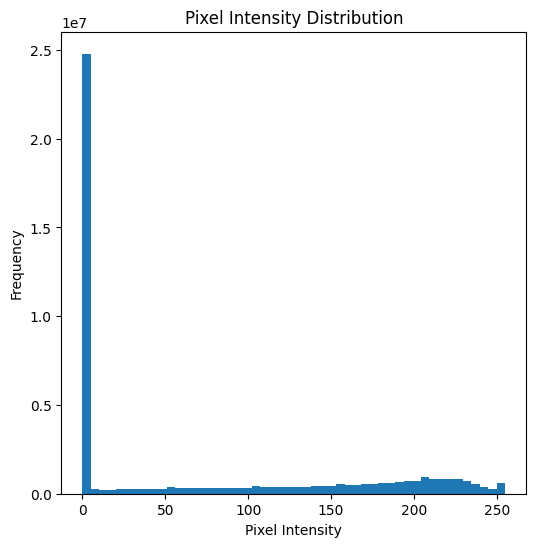

In [ ]:
# pixel intensity distributions
plt.figure(figsize=(6, 6))
plt.hist(train_data.iloc[:, 1:].values.flatten(), bins=50)
plt.title('Pixel Intensity Distribution')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()

**Fully-connected feedforward neural network using Keras and Tensorflow.**

In [ ]:
data = pd.read_csv("fashion-mnist_train.csv")
X = data.drop('label', axis=1).values
y = data['label'].values
X = X / 255.0
y = to_categorical(y)
X = X.reshape(-1, 28, 28)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
# model architecture
model = Sequential([
    Flatten(input_shape=(28, 28)),  
    Dense(128, activation='relu'), 
    Dense(64, activation='relu'),   
    Dense(10, activation='softmax') 
])
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=10, batch_size=128, validation_data=(X_val, y_val))

Epoch 1/10


c:\Users\Abdul\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7327 - loss: 0.8072 - val_accuracy: 0.8389 - val_loss: 0.4398
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8509 - loss: 0.4237 - val_accuracy: 0.8500 - val_loss: 0.4210
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8695 - loss: 0.3625 - val_accuracy: 0.8602 - val_loss: 0.3852
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8775 - loss: 0.3434 - val_accuracy: 0.8743 - val_loss: 0.3451
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8847 - loss: 0.3195 - val_accuracy: 0.8647 - val_loss: 0.3613
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8877 - loss: 0.3077 - val_accuracy: 0.8807 - val_loss: 0.3282
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8953 - loss: 0.2919 - val_accuracy: 0.8811 - val_loss: 0.3305
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8966 - loss: 0.2797 - val_accuracy: 0.8792 - val_

**Evaluate the model using the validation dataset**

In [ ]:
from sklearn.metrics import accuracy_score
# Predicting probabilities 
y_pred_probs = model.predict(X_val)
# predicted probabilities to class labels
y_pred = np.argmax(y_pred_probs, axis=1)
y_val_labels = np.argmax(y_val, axis=1)
# accuracy
accuracy = accuracy_score(y_val_labels, y_pred)
print("Accuracy on validation dataset:", accuracy)

375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 957us/step
Accuracy on validation dataset: 0.8845


**Run the model on the test set**

In [ ]:
test_data = pd.read_csv("fashion-mnist_test.csv")
# Separate features and labels
X_test = test_data.drop('label', axis=1).values
y_test = test_data['label'].values
# Normalizing  pixel[0, 1]
X_test = X_test / 255.0
# Reshaping data to 28x28 images
X_test = X_test.reshape(-1, 28, 28)
y_test = to_categorical(y_test)
# Predicting probabilities 
y_pred_probs_test = model.predict(X_test)
y_pred_test = np.argmax(y_pred_probs_test, axis=1)
y_test_labels = np.argmax(y_test, axis=1)
# accuracy on test dataset
accuracy_test = accuracy_score(y_test_labels, y_pred_test)
print("Accuracy on test dataset:", accuracy_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Accuracy on test dataset: 0.8877


**Conclusion :**

***To summarize, the model's accuracy in classifying fashion MNIST images on the test dataset shows that it can be useful in practical real-world scenarios. However, it's important to keep monitoring and evaluating its performance over time, especially as new data becomes available or requirements change. So, we need to make sure that we stay updated with its performance and keep improving it with the changing needs.***

**Increase the precision for class '5'**

In [ ]:
# precision metric for class 5
def precision_class_5(y_true, y_pred):
    y_true = K.cast(y_true, 'int32')  
    y_pred = K.cast(y_pred, 'int32')  
    class_5_true = K.cast(K.equal(y_true, 5), 'int32')  
    class_5_pred = K.cast(K.equal(y_pred, 5), 'int32')  
    true_positives = K.sum(class_5_true * class_5_pred)
    predicted_positives = K.sum(class_5_pred)
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision
print("precision for class '5':", precision_class_5)


precision for class '5': <function precision_class_5 at 0x000001BC2FE37C40>


**Recall for class '5'**

In [ ]:
data = pd.read_csv("fashion-mnist_train.csv")
X = data.drop('label', axis=1).values
y = data['label'].values
X = X / 255.0
y = to_categorical(y)
X = X.reshape(-1, 28, 28)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
model = Sequential([
    Flatten(input_shape=(28, 28)),  
    Dense(128, activation='relu'),  
    Dense(64, activation='relu'),   
    Dense(10, activation='softmax') 
])
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10, batch_size=128, validation_data=(X_val, y_val))
y_pred = model.predict(X_val)
threshold = 0.5  
y_pred_class_5_adjusted = np.where(y_pred[:, 5] > threshold, 1, 0)
# Calculate recall for class 5
true_positives = np.sum((y_val[:, 5] == 1) & (y_pred_class_5_adjusted == 1))
false_negatives = np.sum((y_val[:, 5] == 1) & (y_pred_class_5_adjusted == 0))
recall_class_5 = true_positives / (true_positives + false_negatives)
print("Recall for class 5 after adjusting threshold:", recall_class_5)

Epoch 1/10


c:\Users\Abdul\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7172 - loss: 0.8244 - val_accuracy: 0.8355 - val_loss: 0.4659
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8488 - loss: 0.4261 - val_accuracy: 0.8533 - val_loss: 0.4014
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8643 - loss: 0.3726 - val_accuracy: 0.8633 - val_loss: 0.3715
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8766 - loss: 0.3377 - val_accuracy: 0.8679 - val_loss: 0.3620
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8795 - loss: 0.3300 - val_accuracy: 0.8788 - val_loss: 0.3356
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8863 - loss: 0.3112 - val_accuracy: 0.8724 - val_loss: 0.3487
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8933 - loss: 0.2931 - val_accuracy: 0.8683 - val_loss: 0.3557
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8975 - loss: 0.2765 - val_accuracy: 0.8803 - val_